In [1]:
library(datasets) # the dataset mtcars is located in this package
str(mtcars) # Compactly displays the internal structure of the object

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


In [2]:
summary(mtcars) # returns a six number summary of each variable in the data frame

      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  
      drat             wt             qsec             vs        
 Min.   :2.760   Min.   :1.513   Min.   :14.50   Min.   :0.0000  
 1st Qu.:3.080   1st Qu.:2.581   1st Qu.:16.89   1st Qu.:0.0000  
 Median :3.695   Median :3.325   Median :17.71   Median :0.0000  
 Mean   :3.597   Mean   :3.217   Mean   :17.85   Mean   :0.4375  
 3rd Qu.:3.920   3rd Qu.:3.610   3rd Qu.:18.90   3rd Qu.:1.0000  
 Max.   :4.930   Max.   :5.424   Max.   :22.90   Max.   :1.0000  
       am              gear            carb      
 Min.   :0.0000   Min.   :3.000  

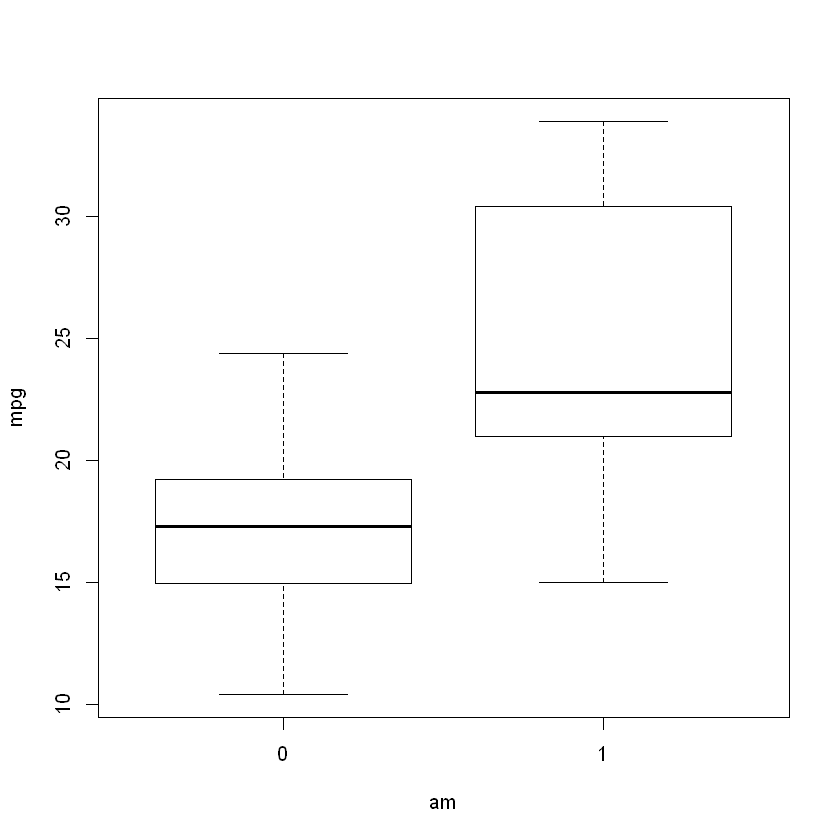

In [3]:
boxplot(mpg ~ am, xlab="am", ylab="mpg", data=mtcars) # resuts in Figure 2.2.c

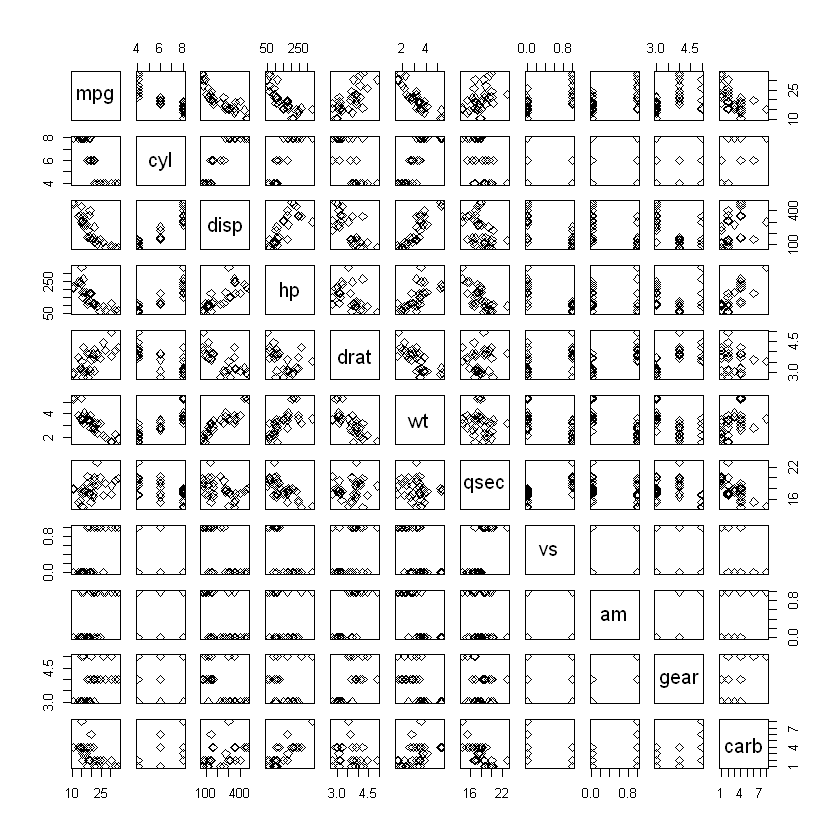

In [4]:
pairs(mtcars, pch=5) # scatterplot matrix

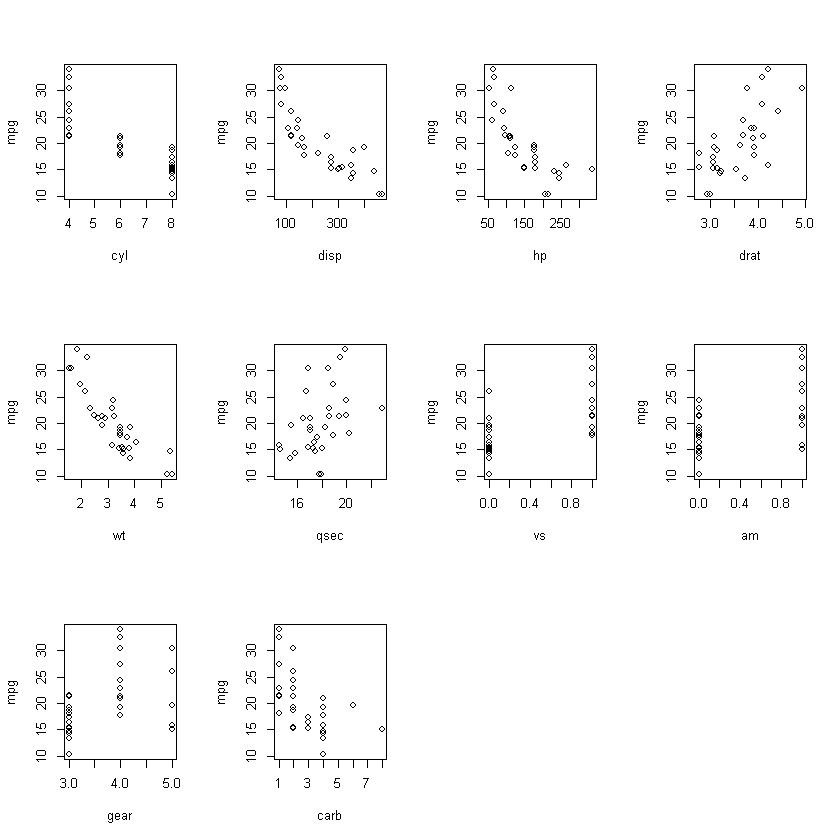

In [5]:
par(mfrow=c(3,4))
plot(mpg ~ ., data=mtcars) # scatterplots with mpg on the y -axis

In [6]:
mtcars1 <- data.frame(lMPG=log(mtcars$mpg), wCyl=sqrt(mtcars$cyl),
            lDisp=log(mtcars$disp), lHP=log(mtcars$hp),
            drat=mtcars$drat, lWT=log(mtcars$wt),
            qsec=mtcars$qsec, VS=mtcars$vs, AM=mtcars$am,
            wGear=sqrt(mtcars$gear), wCarb=sqrt(mtcars$carb))

In [7]:
mtc1.lm1 <- lm(lMPG ~ lDisp + lHP + lWT + drat + qsec + wCarb + wCyl + wGear + VS + AM, data=mtcars1)

In [8]:
summary(mtc1.lm1)


Call:
lm(formula = lMPG ~ lDisp + lHP + lWT + drat + qsec + wCarb + 
    wCyl + wGear + VS + AM, data = mtcars1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.16637 -0.06968  0.01446  0.05770  0.20108 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)  3.733511   1.325541   2.817   0.0103 *
lDisp       -0.167383   0.179541  -0.932   0.3618  
lHP         -0.159416   0.134980  -1.181   0.2508  
lWT         -0.377992   0.250297  -1.510   0.1459  
drat         0.004172   0.074864   0.056   0.9561  
qsec         0.014235   0.033289   0.428   0.6733  
wCarb       -0.149562   0.115652  -1.293   0.2100  
wCyl         0.188301   0.217927   0.864   0.3973  
wGear        0.449734   0.264221   1.702   0.1035  
VS          -0.040222   0.088789  -0.453   0.6552  
AM          -0.054940   0.098564  -0.557   0.5831  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1134 on 21 degrees of freedom
Multiple R-squared

In [9]:
mtc1.vs <- step(
    mtc1.lm1, 
    scope=list(lower=~ 1, upper=~ lDisp + lHP + lWT + drat + qsec + wCarb + wCyl + wGear + VS + AM))

Start:  AIC=-130.82
lMPG ~ lDisp + lHP + lWT + drat + qsec + wCarb + wCyl + wGear + 
    VS + AM

        Df Sum of Sq     RSS     AIC
- drat   1  0.000040 0.26986 -132.82
- qsec   1  0.002350 0.27217 -132.55
- VS     1  0.002637 0.27246 -132.51
- AM     1  0.003992 0.27381 -132.35
- wCyl   1  0.009593 0.27941 -131.71
- lDisp  1  0.011167 0.28099 -131.53
<none>               0.26982 -130.82
- lHP    1  0.017922 0.28774 -130.77
- wCarb  1  0.021488 0.29131 -130.37
- lWT    1  0.029303 0.29912 -129.53
- wGear  1  0.037225 0.30704 -128.69

Step:  AIC=-132.82
lMPG ~ lDisp + lHP + lWT + qsec + wCarb + wCyl + wGear + VS + 
    AM

        Df Sum of Sq     RSS     AIC
- qsec   1  0.002313 0.27217 -134.55
- VS     1  0.002606 0.27247 -134.51
- AM     1  0.003955 0.27381 -134.35
- wCyl   1  0.009768 0.27963 -133.68
- lDisp  1  0.011133 0.28099 -133.53
<none>               0.26986 -132.82
- lHP    1  0.019281 0.28914 -132.61
- wCarb  1  0.022980 0.29284 -132.20
- lWT    1  0.029993 0.29985 -131.

In [10]:
mtc1.vs$anova

Step    Df Deviance     Resid. Df Resid. Dev AIC      
1         NA           NA 21        0.2698189  -130.8237
2 - drat   1 3.990339e-05 22        0.2698588  -132.8190
3 - qsec   1 2.312770e-03 23        0.2721715  -134.5459
4 - VS     1 1.431943e-03 24        0.2736035  -136.3780
5 - AM     1 5.877819e-03 25        0.2794813  -137.6978
6 - wCyl   1 8.309796e-03 26        0.2877911  -138.7602
7 - lDisp  1 4.577057e-03 27        0.2923682  -140.2553
8 - wCarb  1 1.745983e-02 28        0.3098280  -140.3992
9 - wGear  1 1.217931e-02 29        0.3220073  -141.1653

In [11]:
coef(mtc1.vs)

(Intercept)         lHP         lWT 
  4.8346929  -0.2553185  -0.5622822

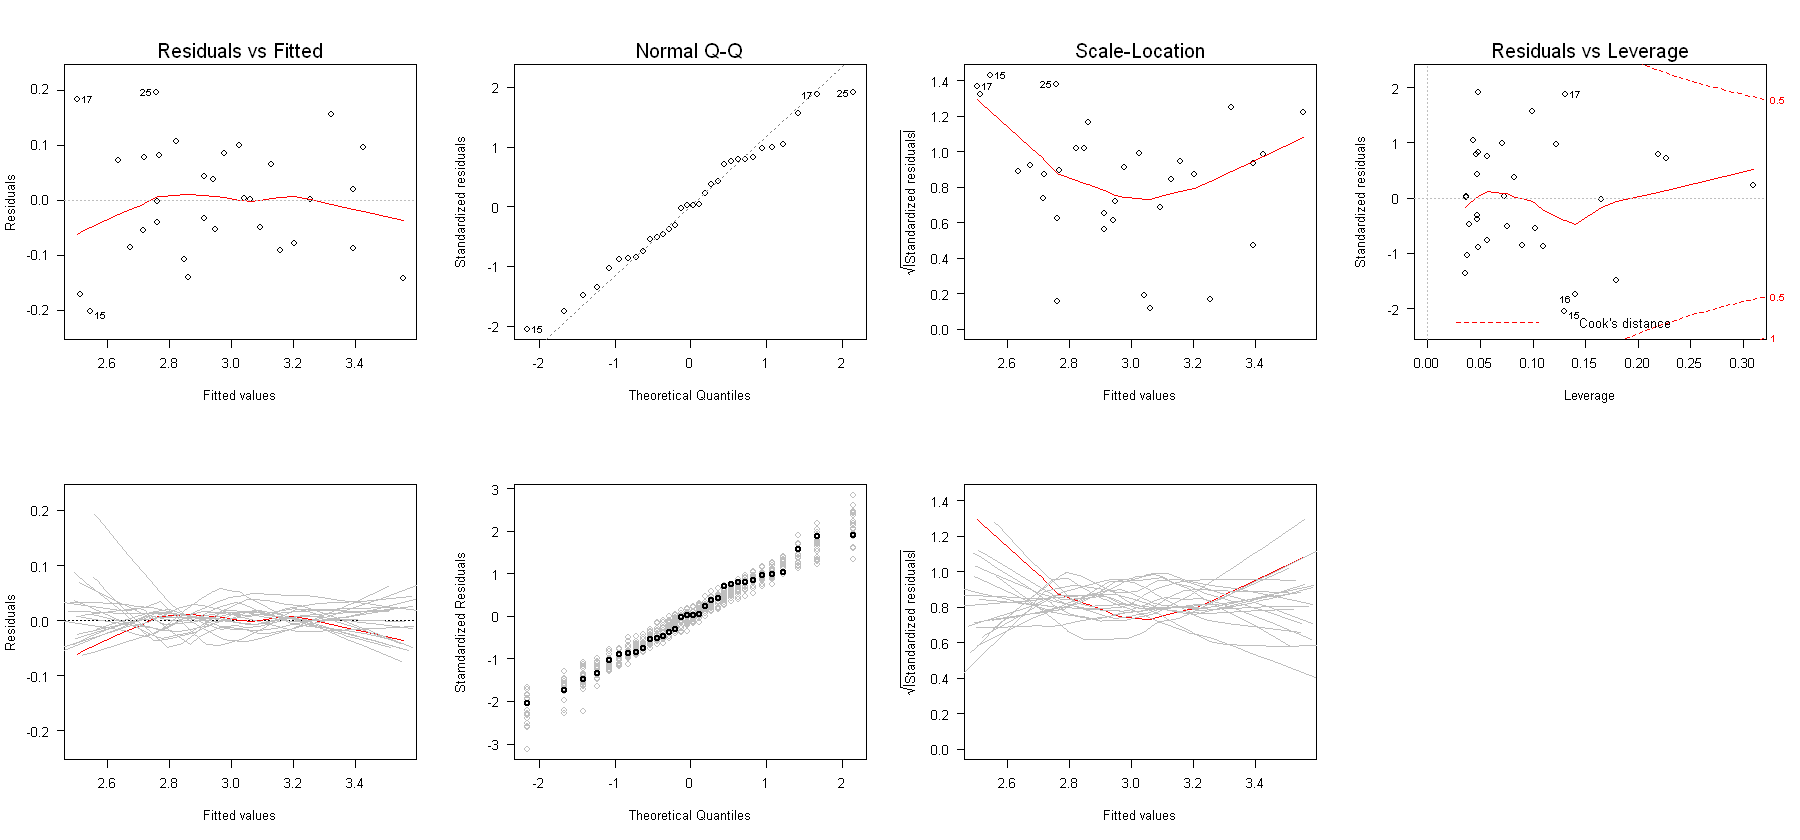

In [12]:
mtc1.lm2 <- lm(lMPG ~ lHP + lWT, data = mtcars1)
source("../lib/RFn_Plot-lmSim.R") # source the R function plot.lmSim
options(repr.plot.width=15, repr.plot.height=7, repr.plot.pointsize=12)
par(mfrow=c(2,4), las=1)
plot(mtc1.lm2)
plot.lmSim(mtc1.lm2, SEED=4711) # explained in 2.D.i

In [13]:
mtcars2 <- data.frame(lMPG=log(mtcars$mpg), fCyl=as.factor(mtcars$cyl),
    lDisp=log(mtcars$disp), lHP=log(mtcars$hp),
    drat=mtcars$drat, lWT=log(mtcars$wt),
    qsec=mtcars$qsec,
    fVS=factor(mtcars$vs, labels=c("v", "straight")),
    fAM=factor(mtcars$am, labels=c("automatic", "manual")),
    fGear=as.factor(mtcars$gear), wCarb=sqrt(mtcars$carb))

In [14]:
levels(mtcars2$fCyl)

[1] "4" "6" "8"

In [15]:
mtc2.lm1 <- lm(lMPG ~ lDisp + lHP + lWT + drat + qsec + wCarb + fCyl + fVS + fAM + fGear, data=mtcars2)
summary(mtc1.lm1)


Call:
lm(formula = lMPG ~ lDisp + lHP + lWT + drat + qsec + wCarb + 
    wCyl + wGear + VS + AM, data = mtcars1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.16637 -0.06968  0.01446  0.05770  0.20108 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)  3.733511   1.325541   2.817   0.0103 *
lDisp       -0.167383   0.179541  -0.932   0.3618  
lHP         -0.159416   0.134980  -1.181   0.2508  
lWT         -0.377992   0.250297  -1.510   0.1459  
drat         0.004172   0.074864   0.056   0.9561  
qsec         0.014235   0.033289   0.428   0.6733  
wCarb       -0.149562   0.115652  -1.293   0.2100  
wCyl         0.188301   0.217927   0.864   0.3973  
wGear        0.449734   0.264221   1.702   0.1035  
VS          -0.040222   0.088789  -0.453   0.6552  
AM          -0.054940   0.098564  -0.557   0.5831  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1134 on 21 degrees of freedom
Multiple R-squared

In [16]:
drop1(mtc2.lm1, test="F")

Df Sum of Sq    RSS       AIC       F value     Pr(>F)   
<none> NA           NA 0.2663283 -127.2404          NA        NA
lDisp   1 8.277384e-03 0.2746056 -128.2610 0.590513026 0.4516672
lHP     1 4.862617e-03 0.2711909 -128.6614 0.346901721 0.5628102
lWT     1 3.200692e-02 0.2983352 -125.6088 2.283391012 0.1472192
drat    1 6.164149e-05 0.2663899 -129.2330 0.004397537 0.9478207
qsec    1 2.015129e-03 0.2683434 -128.9992 0.143760411 0.7087750
wCarb   1 2.439599e-02 0.2907242 -126.4357 1.740423040 0.2027638
fCyl    2 6.671527e-03 0.2729998 -130.4486 0.237975155 0.7905366
fVS     1 5.342336e-03 0.2716706 -128.6048 0.381125122 0.5443302
fAM     1 6.351439e-03 0.2726797 -128.4862 0.453115087 0.5089650
fGear   2 3.847875e-02 0.3048070 -126.9220 1.372547138 0.2774769

In [17]:
mtcars3 <- mtcars
mtc3.lm1 <- lm(mpg ~ am + wt + qsec, data=mtcars3)
mtcars3$gpm <- 1/mtcars3$mpg*100
mtcars3$op <- mtcars3$hp / mtcars3$wt
mtc3.lm2 <- lm(gpm ~ wt + op, data=mtcars3)

In [18]:
## Repeated for convenience:
mtc2.lm2 <- lm(lMPG ~ lHP + lWT, data = mtcars2) # cf. 2.2.n
mtc3.lm1 <- lm(mpg ~ am + wt + qsec, data=mtcars3) # cf. 2.3.a
mtc3.lm2 <- lm(gpm ~ wt + op, data=mtcars3) # cf. 2.3.c
## My own function to calculate the PRESS residuals:
f.PRESSres <- function(obj) {
    resid(obj)/(1-lm.influence(obj)$hat)
}
# function to calculate leave-one-out prediction
f.pLOO <- function(y,obj){ 
    y - resid(obj)/(1-lm.influence(obj)$hat)
}
mtc2.lm2.looP <- f.pLOO(y=mtcars2$lMPG, mtc2.lm2)
mtc2.lm2.looPo <- exp(mtc2.lm2.looP + summary(mtc2.lm2)$sigma^2/2)
PRESSres1 <- mtcars$mpg - mtc2.lm2.looPo
sum(PRESSres1^2)
PRESSres2 <- f.PRESSres(mtc3.lm1)
sum(PRESSres2^2)

[1] 160.9463

[1] 231.3035

In [19]:
mtc2.new <- data.frame(lWT=log(3.410), lHP=log(133))
peu.lp <- predict(mtc2.lm2, newdata=mtc2.new)
exp(peu.lp)
exp(peu.lp + summary(mtc2.lm2)$sigma^2/2)

1 
18.10771

1 
18.20852

In [20]:
peu.lp <- predict(mtc2.lm2, newdata=mtc2.new, interval="prediction", level=0.95)
exp(peu.lp)

fit      lwr      upr     
1 18.10771 14.53761 22.55453